## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
print('Number of rows in dataset is {}.'.format(df.shape[0]))

Number of rows in dataset is 294478.


c. The number of unique users in the dataset.

In [4]:
print('The number of unique users in the dataset is {}.'.format(df.user_id.nunique()))

The number of unique users in the dataset is 290584.


d. The proportion of users converted.

In [5]:
p_user_conv= df.query('converted==1').user_id.count()/df.shape[0]
print('The proportion of users converted is {}.'.format(round(p_user_conv,2)))

The proportion of users converted is 0.12.


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
print('The number of times the new_page and treatment dont match is {}.'.format(df.query('group=="control" & landing_page=="new_page"').user_id.count()+ df.query('group=="treatment" & landing_page=="old_page"').user_id.count()))

The number of times the new_page and treatment dont match is 3893.


f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2= df.copy()
#excluding rows when treatment and newpage doesn't match or control and old_page doesn't match
df2= df2[((df2['group']=="treatment")== (df2['landing_page']=="new_page")) !=False]

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
print('Number of  unique user_ids in df2 are {}.'.format(df2.user_id.nunique()))

Number of  unique user_ids in df2 are 290584.


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
print('Duplicated user id is {}.'.format(df2[df2['user_id'].duplicated()].user_id.iloc[0]))

Duplicated user id is 773192.


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop(2893, inplace=True)
df2.query('user_id==773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
p_conv= df2.converted.mean()
p_conv

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
p_control_conv= df2.query('group=="control"').converted.mean()
p_control_conv

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
p_treatment_conv= df2.query('group=="treatment"').converted.mean()
p_treatment_conv

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
p_new_page= df2.query('landing_page=="new_page"').user_id.count()/df2.shape[0]
print(' probability that an individual received the new page is {}.'.format(round(p_new_page,2)))

 probability that an individual received the new page is 0.5.


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

There is no sufficient evidence to conclude that the new treatment page leads to more conversions. The conversion rate for both the control and treatment group is almost same, slightly more for the control group only. 

Also there is no bias in the users being landed on both the pages. Probability of user recieving the new page is 0.5 only

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

Null Hypothesis: **$p_{old}$** - **$p_{new}$** >= 0

Alternative Hypothesis: **$p_{old}$** - **$p_{new}$** <0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
p_new= p_conv
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old= p_conv
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
n_new= df2.query('landing_page=="new_page"').user_id.count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
n_old= df2.query('landing_page=="old_page"').user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted= np.random.choice([1,0],size=n_new,p=[p_new, 1-p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted= np.random.choice([1,0],size=n_old,p=[p_old, 1-p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
new_page_converted.mean()-old_page_converted.mean()

0.00012161954466556602

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
p_diffs=[]
for i in range(10000):
    new_page_converted= np.random.choice([1,0],size=n_new,p=[p_new, 1-p_new])
    old_page_converted= np.random.choice([1,0],size=n_old,p=[p_old, 1-p_old])
    p_diffs.append(new_page_converted.mean()-old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

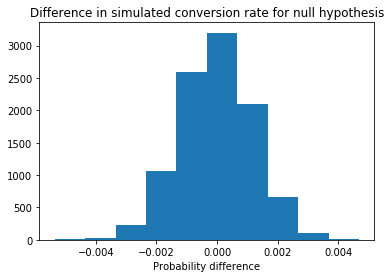

In [26]:
p_diffs= np.array(p_diffs)
plt.hist(p_diffs);
plt.title('Difference in simulated conversion rate for null hypothesis')
plt.xlabel('Probability difference');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

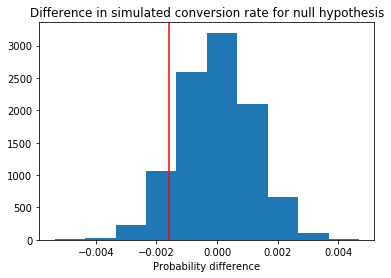

In [27]:
act_diff= p_treatment_conv-p_control_conv
act_diff
plt.hist(p_diffs);
plt.title('Difference in simulated conversion rate for null hypothesis')
plt.xlabel('Probability difference')
plt.axvline(act_diff, color='r');


In [28]:
(p_diffs > act_diff).mean()

0.90439999999999998

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

The null hypothesis we assumed is that- there is no difference in probability of conversion rates of treatment and control groups. 

We calculated the p-value which is equal to around 0.9. For us to reject the null hypothesis the p-value should be below alpha value which we take as 0.05 in this case as we have agreed for 5% chance of type-1 error. 

As in our case the p-value is quite large, we cannot reject the null hypothesis

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

convert_old = df2.query('group=="control" & converted==1').converted.count()
convert_new = df2.query('group=="treatment" & converted==1').converted.count()
n_old = df2.query('landing_page=="old_page"').user_id.count()
n_new = df2.query('landing_page=="new_page"').user_id.count()
print('Convert old is {}.'.format(convert_old))
print('Convert new is {}.'.format(convert_new))
print('Number old is {}.'.format(n_old))
print('Number new is {}.'.format(n_new))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Convert old is 17489.
Convert new is 17264.
Number old is 145274.
Number new is 145310.


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [30]:
from statsmodels.stats.proportion import proportions_ztest
count= [convert_new,convert_old]
nobs= [n_new,n_old]
stat, p_val= proportions_ztest(count, nobs, alternative='larger')
stat, p_val
print('The z-score is {}.'.format(round(stat,2)))
print('The p-value is {}.'.format(round(p_val,2)))

The z-score is -1.31.
The p-value is 0.91.


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

Z-score gives an idea of how far from the mean a data point is i.e. act_diff. 

P-value gives the probability of obtaining a test results atleast as extreme as the observed result, assuming that the null hypothesis is true. Small p-value means such a result is very unlikely under the null hypothesis condition

Yes, the p-value here is also 0.9 as we computed in the parts j and k

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

As we are predicting only two outcomes, we can use logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
df2['intercept']=1
df2[['ab_page','oth_page']]= pd.get_dummies(df2['landing_page'])
df2= df2.drop('oth_page',axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [32]:
logit_mod= sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results= logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-09 08:38 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**

Null Hypothesis: We assumed there is no difference in probability of conversion rates of both treatment and control groups.

The p-value in this case is 0.1899. It is much less then the value obtained in Part II. This is because the logistic regression is two tailed test.

But as the p-value is still greater than alpha(0.05), we still cannot reject null hypothesis

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

The conversion of a user might depend on various other factors like location, age, earnings, gender, society etc. 

Adding other factors might help in knowing how the new page is catering to those additional factors

Adding a relevant factor might prevent the bias in the estimate of other regression coefficient but will increase the variance of other regression coefficient. 
Adding an irrelevant factor will just increase variance and would be of no help

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
df_countries= pd.read_csv('countries.csv')
df_new= df2.set_index('user_id').join(df_countries.set_index('user_id'),on= 'user_id', how='inner')
df_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [35]:
df_new.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [36]:
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
user_id,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [37]:
#train the model
logit_mod= sm.Logit(df_new['converted'], df_new[['intercept','US','CA']])
results= logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-09 08:38 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9868    0.0114  -174.1736  0.0000  -2.0092  -1.9645
US           -0.0099    0.0133    -0.7458  0.4558  -0.0360   0.0161
CA           -0.0507    0.0284    -1.7863  0.0740  -0.1064   0.0049
==================================================================

"""

The p-value for all variables is still higher than 0.05

Therefore we can say that country doesn't have significant impact on the conversion

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [38]:
#creating columns for CA and US with users landing on new page of that country
df_new['CA_converted']= df_new['CA']*df_new['ab_page']
df_new['US_converted']= df_new['US']*df_new['ab_page']
df_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,CA_converted,US_converted
user_id,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0


In [39]:
#Fit linear model
logit_mod= sm.Logit(df_new['converted'], df_new[['intercept','ab_page','CA','US', 'CA_converted','US_converted']])
results= logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-09 08:38 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
intercept        -1.9922   0.0161 -123.4571 0.0000 -2.0238 -1.9606
ab_page           0.0108   0.0228    0.4749 0.6349 -0.0339  0.0555
CA               -0.0118   0.0398   -0.2957 0.7674 -0.0899  0.0663
US                0.0057   0.0188    0.3057 0.7598 -0.0311  0.0426
CA_converted     -0.0783   0.0568   -1.3783 0.1681 -0.1896  0.0330
US_converted     -0.0314   0.0266   -1.1807 0.2377 -0.0835  0.0207
==================================================================

"""

The p-value for country variables is still higher than 0.05, so we cannot reject null hypothesis

Therefore we can say that interaction between page and country also doesn't have significant impact on the conversion

**Conclusion**

We don't have sufficient evidence to reject the null hypothesis

We cannot say that the new pave is adding value to the brand.

Maybe there are other factors influencing the conversion

We can say that we should drop the idea of new pagw

https://stats.stackexchange.com/questions/304707/costs-and-benefits-of-adding-more-variables-to-multiple-regression
https://stackoverflow.com/questions/49814258/statsmodel-attributeerror-module-scipy-stats-has-no-attribute-chisqprob
https://en.wikipedia.org/wiki/P-value
https://www.statisticshowto.com/probability-and-statistics/z-score/
https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0